<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Lectura-de-los-datos" data-toc-modified-id="Lectura-de-los-datos-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Lectura de los datos</a></span></li></ul></div>

# Práctica 7: HMM

In [1]:
import numpy as np
%matplotlib notebook
from matplotlib import pyplot as plt
from matplotlib import rcParams
rcParams['figure.figsize'] = (8.0, 4.0)
from time import sleep
from scipy.linalg import sqrtm
from matplotlib import colors as mcolors
from matplotlib.patches import Ellipse

from markov import *

%load_ext autoreload
%autoreload 2

### Lectura de los datos

Leemos las secuencias ST1, ..., ST6 y sus respectivas mediciones X1, ..., X6 guardados en el archivo `data.mat`. Además generamos los modelos hmm1, ..., hmm7 a mano.

In [2]:
# Lectura de las secuencias y las mediciones ya generadas.
from scipy.io import loadmat
x = loadmat('./data.mat')
X1, X2, X3, X4, X5, X6 = x['X1'], x['X2'], x['X3'], x['X4'], x['X5'], x['X6']
ST1, ST2, ST3, ST4, ST5, ST6 = x['ST1'].astype(np.int)[0]-1, x['ST2'].astype(np.int)[0]-1, x['ST3'].astype(np.int)[0]-1, x['ST4'].astype(np.int)[0]-1, x['ST5'].astype(np.int)[0]-1, x['ST6'].astype(np.int)[0]-1

# GENDATA Generation of simulation data for HMM lab.
# Specification of simulated vowels statistics.
Pa = 0.25
mu_a = np.array([730., 1090.])
std_a = np.array([[35.,  20.],
                  [20.,  230.]])
var_a = std_a.dot(std_a)

Pe = 0.3
mu_e = np.array([530., 1840.])
std_e = np.array([[120.,  25.],
                  [25.,  190.]])
var_e = std_e.dot(std_e)

Pi = 0.25
mu_i = np.array([270., 2290.])
std_i = np.array([[50.,  5.],
                  [5.,  190.]])
var_i = std_i.dot(std_i)

Po = 0.15
mu_o = np.array([570., 840.])
std_o = np.array([[40.,  20.],
                  [20.,  140.]])
var_o = std_o.dot(std_o)

Py = 0.05
mu_y = np.array([440., 1020.])
std_y = np.array([[80.,  40.],
                  [40.,  130.]])
var_y = std_y.dot(std_y)

        
# 1: ergodic /aiy/, "unstable"
means = np.stack((mu_a,mu_i,mu_y))
vrs = np.stack((var_a,var_i,var_y))
trans = np.array([[0.0, 1.0, 0.0, 0.0, 0.0],
                  [0.0, 0.4, 0.3, 0.3, 0.0],
                  [0.0, 0.3, 0.4, 0.3, 0.0],
                  [0.0, 0.3, 0.3, 0.3, 0.1],
                  [0.0, 0.0, 0.0, 0.0, 1.0]])

hmm1 = hmm(means, vrs, trans)

# 2: ergodic /aiy/, "stable"
means = np.stack((mu_a,mu_i,mu_y))
vrs = np.stack((var_a,var_i,var_y))
trans = np.array([[0.0, 1.0, 0.0, 0.0, 0.0],
                  [0.0, 0.95, 0.025, 0.025, 0.0],
                  [0.0, 0.025, 0.95, 0.025, 0.0],
                  [0.0, 0.02, 0.02, 0.95, 0.01],
                  [0.0, 0.0, 0.0, 0.0, 1.0]])

hmm2 = hmm(means, vrs, trans)

# 3: left-right /aiy/, unstable
means = np.stack((mu_a,mu_i,mu_y))
vrs = np.stack((var_a,var_i,var_y))
trans = np.array([[0.0, 1.0, 0.0, 0.0, 0.0],
                  [0.0, 0.5, 0.5, 0.0, 0.0],
                  [0.0, 0.0, 0.5, 0.5, 0.0],
                  [0.0, 0.0, 0.0, 0.5, 0.5],
                  [0.0, 0.0, 0.0, 0.0, 1.0]])

hmm3 = hmm(means, vrs, trans)

# 4: left-right /aiy/, stable
means = np.stack((mu_a,mu_i,mu_y))
vrs = np.stack((var_a,var_i,var_y))
trans = np.array([[0.0, 1.0, 0.0, 0.0, 0.0],
                  [0.0, 0.95, 0.05, 0.0, 0.0],
                  [0.0, 0.0, 0.95, 0.05, 0.0],
                  [0.0, 0.0, 0.0, 0.95, 0.05],
                  [0.0, 0.0, 0.0, 0.0, 1.0]])

hmm4 = hmm(means, vrs, trans)

# 5: left-right /yia/, stable
means = np.stack((mu_y,mu_i,mu_a))
vrs  = np.stack((var_y,var_i,var_a))
trans = np.array([[0.0, 1.0, 0.0, 0.0, 0.0],
                  [0.0, 0.95, 0.05, 0.0, 0.0],
                  [0.0, 0.0, 0.95, 0.05, 0.0],
                  [0.0, 0.0, 0.0, 0.95, 0.05],
                  [0.0, 0.0, 0.0, 0.0, 1.0]])

hmm5 = hmm(means, vrs, trans)

# 6: left-right /aie/, stable
means = np.stack((mu_a,mu_i,mu_e))
vrs  = np.stack((var_a,var_i,var_e))
trans = np.array([[0.0, 1.0,  0.0,  0.0,  0.0],
                  [0.0, 0.95, 0.05, 0.0,  0.0],
                  [0.0, 0.0,  0.95, 0.05, 0.0],
                  [0.0, 0.0,  0.0,  0.95, 0.05],
                  [0.0, 0.0,  0.0,  0.0,  1.0]]);

hmm6 = hmm(means, vrs, trans)

# 7: left-right /aiy/, stable w/ unequal stay probas
means = np.stack((mu_a,mu_i,mu_y))
vrs  = np.stack((var_a,var_i,var_y))
trans = np.array([[0.0, 1.0,  0.0,  0.0,  0.0],
                  [0.0, 0.7,  0.3,  0.0,  0.0],
                  [0.0, 0.0,  0.95, 0.05, 0.0],
                  [0.0, 0.0,  0.0,  0.7,  0.3],
                  [0.0, 0.0,  0.0,  0.0,  1.0]])

hmm7 = hmm(means, vrs, trans)

In [12]:
def logpdfnorm(mu,sigma,x):
    """
    
        Evaluación de los puntos x en K gaussianas de medias mu y varianzas sigma.
        
        mu: (K,d) array que contiene las medias de las gaussianas en las filas.
        sigma: (K,d,d) array que contiene las matrices de covarianzas de las gaussianas.
        x: (N,d) array que contiene los lugares en donde evaluar las gaussianas.
        
        return: (N,K) array con los valores de la normal en los puntos x
    """
        
    d = x.shape[1]
    x_unbiased = x - mu[:,np.newaxis]
    sigma_inv = np.linalg.inv(sigma)
    y = - (d/2) * np.log(2*np.pi) - .5 * np.log(np.linalg.det(sigma)) - .5 * np.einsum('ijk,ijk->ij',np.matmul(x_unbiased,sigma_inv),x_unbiased).T

    return y

def logdot(log_a, log_b):
    """
        Función para calcular el producto de matrices que contienen logaritmos
        de probabilidades. Qué grande Stack Overflow!!!
        https://stackoverflow.com/questions/23630277/numerically-stable-way-to-multiply-log-probability-matrices-in-numpy
    """
    max_log_a, max_log_b = np.max(log_a), np.max(log_b)
    a, b = log_a - max_log_a, log_b - max_log_b
    np.exp(a, out=a)
    np.exp(b, out=b)
    log_c = np.log(np.dot(a, b))
    log_c += max_log_a + max_log_b
    return log_c


def logfw(X,hmm):
    
    T = X.shape[0] # Cantidad de mediciones
    N = hmm.numStates - 2 # Cantidad de estados sin contar el final y el inicial
    zero = 1e-100 # Valor mínimo para evitar división por cero
    
    # Evaluación del logaritmo de la normal 
    log_b = logpdfnorm(hmm.means,hmm.vrs,X)
        
    # Matriz de transición para la recursión
    log_trans = hmm.trans.T[1:-1,1:-1].copy()
    log_trans[log_trans<zero] = zero
    np.log(log_trans, out=log_trans)
    
    # Inicialización del log_alpha
    log_alpha = np.zeros((N,T))
    log_a0 = hmm.trans[0,1:-1].copy()
    log_a0[log_a0<zero] = zero
    np.log(log_a0, out=log_a0)
    log_alpha[:,0] = log_b[0,:] + log_a0
    
    # Recursión alfa
    for i in range(1,T):
        log_alpha[:,i] = log_b[i,:] + logdot(log_trans,log_alpha[:,i-1])
    
    # Cálculo de la probabilidad
    log_af = hmm.trans[1:-1,-1].copy()
    log_af[log_af<zero] = zero
    np.log(log_af, out=log_af)
    log_prob = logdot(log_alpha[:,-1],log_af)
    
    return log_prob, log_alpha

def logbkw(X,hmm):
    
    T = X.shape[0] # Cantidad de mediciones
    N = hmm.numStates - 2 # Cantidad de estados sin contar el final y el inicial
    zero = 1e-100 # Valor mínimo para evitar división por cero
    
    # Evaluación del logaritmo de la normal 
    log_b = logpdfnorm(hmm.means,hmm.vrs,X)

    # Matriz de transición para la recursión
    log_trans = hmm.trans[1:-1,1:-1].copy()
    log_trans[log_trans<zero] = zero
    np.log(log_trans, out=log_trans)
    
    # Inicialización del beta
    log_beta = np.zeros((N,T))
    log_betaf = hmm.trans[1:-1,-1].copy()
    log_betaf[log_betaf<zero] = zero
    np.log(log_betaf, out=log_beta[:,-1])
    
    # Recursión beta
    for i in range(T-1,0,-1):
        log_beta[:,i-1] = logdot(log_trans,log_beta[:,i] + log_b[i,:])
        
    # Cálculo de la probabilidad
    log_pi = hmm.trans[0,1:-1].copy()
    log_pi[log_pi<zero] = zero
    np.log(log_pi, out=log_pi)
    log_prob = logdot(log_beta[:,0],log_pi)
    
    return log_prob, log_beta

def get_gamma(X,hmm):
    
    _ , log_alpha = logfw(X,hmm)
    _ , log_beta = logbkw(X,hmm)
    
    log_alpha_N = log_alpha[:,-1]
    log_beta_N = log_beta[:,-1]
    log_gamma = log_alpha + log_beta - logdot(log_alpha_N,log_beta_N)
    
    return log_gamma


# def get_xi(X,hmm):
    
#     zero = 1e-100 # Valor mínimo para evitar división por cero
    
#     _ , log_alpha = logfw(X,hmm)
#     _ , log_beta = logbkw(X,hmm)
    
#     log_alpha_N = log_alpha[:,-1]
#     log_beta_N = log_beta[:,-1]
    
#     log_b = logpdfnorm(hmm.means,hmm.vrs,X)
    
#     log_trans = hmm.trans[1:-1,1:-1].copy()
#     log_trans[log_trans<zero] = zero
#     np.log(log_trans, out=log_trans)
    
#     log_beta_roll = np.roll(log_beta,shift=-1,axis=1)
#     log_b_roll = np.roll(log_b.T,shift=-1,axis=1)
    
#     log_xi = log_alpha + \
#              (log_beta_roll + log_b_roll)[:,np.newaxis] + \
#              log_trans[:,:,np.newaxis] - \
#              logdot(log_alpha_N, log_beta_N)
    
    
#     return np.transpose(log_xi,(2,0,1))


def get_xi(X,hmm):
    
    zero = 1e-100 # Valor mínimo para evitar división por cero
    
    _ , log_alpha = logfw(X,hmm)
    _ , log_beta = logbkw(X,hmm)
    
    T = log_alpha.shape[1]
    N = log_alpha.shape[0]
    
    log_alpha_N = log_alpha[:,-1]
    log_beta_N = log_beta[:,-1]
    
    log_b = logpdfnorm(hmm.means,hmm.vrs,X)
    
    log_trans = hmm.trans[1:-1,1:-1].copy()
    log_trans[log_trans<zero] = zero
    np.log(log_trans, out=log_trans)
    
    log_alpha_roll = np.roll(log_alpha,shift=1,axis=1)
    
    log_xi = np.transpose(log_alpha_roll.reshape(N,1,T) + (log_beta + log_b.T),(2,0,1))
    log_xi += log_trans - logdot(log_alpha_N,log_beta_N)
             
    return log_xi

get_xi(X3,hmm6)


array([[[-1.37134551e+03, -1.35627753e+03, -1.55875051e+03],
        [-1.65893894e+03, -1.41071931e+03, -1.38887395e+03],
        [-1.55640128e+03, -1.53838886e+03, -1.28339184e+03]],

       [[-9.68719911e+01, -9.09494702e-13, -2.11097703e+02],
        [-5.55490377e+02, -2.25466731e+02, -2.12246096e+02],
        [-5.33645013e+02, -4.33828583e+02, -1.87456294e+02]],

       [[-1.44006448e+02, -9.68719911e+01, -3.04388155e+02],
        [-2.97088286e+02, -1.68021742e+01, -5.04564923e-08],
        [-4.87489018e+02, -4.37410123e+02, -1.87456294e+02]],

       [[-1.44483472e+02, -1.44975684e+02, -3.50709894e+02],
        [-2.68045746e+02, -3.53863028e+01, -1.68021742e+01],
        [-2.54188011e+02, -2.51735784e+02, -5.04562649e-08]],

       [[-1.44483472e+02, -1.75965593e+02, -3.89333749e+02],
        [-2.48006037e+02, -4.63365032e+01, -3.53863203e+01],
        [-2.15564156e+02, -2.44101838e+02, -6.82121026e-13]],

       [[-1.44483472e+02, -1.65630407e+02, -4.04289193e+02],
        [-2.58

In [4]:
a = np.arange(4*3*3).reshape(4,3,3)
b = np.ones((3,3))
print(a)
print(b)
print(a+b)

[[[ 0  1  2]
  [ 3  4  5]
  [ 6  7  8]]

 [[ 9 10 11]
  [12 13 14]
  [15 16 17]]

 [[18 19 20]
  [21 22 23]
  [24 25 26]]

 [[27 28 29]
  [30 31 32]
  [33 34 35]]]
[[1. 1. 1.]
 [1. 1. 1.]
 [1. 1. 1.]]
[[[ 1.  2.  3.]
  [ 4.  5.  6.]
  [ 7.  8.  9.]]

 [[10. 11. 12.]
  [13. 14. 15.]
  [16. 17. 18.]]

 [[19. 20. 21.]
  [22. 23. 24.]
  [25. 26. 27.]]

 [[28. 29. 30.]
  [31. 32. 33.]
  [34. 35. 36.]]]


In [5]:
np.random.seed(1234823)
a = np.arange(12).reshape(4,1,3)
b = np.random.randint(5,size=12).reshape(4,3)
print(a)
print(b)
print(a+b)
print((a+b)[:,:,1])
print(np.transpose(a+b,(2,0,1))[1,:,:])

[[[ 0  1  2]]

 [[ 3  4  5]]

 [[ 6  7  8]]

 [[ 9 10 11]]]
[[1 3 2]
 [1 2 2]
 [2 1 0]
 [2 0 1]]
[[[ 1  4  4]
  [ 1  3  4]
  [ 2  2  2]
  [ 2  1  3]]

 [[ 4  7  7]
  [ 4  6  7]
  [ 5  5  5]
  [ 5  4  6]]

 [[ 7 10 10]
  [ 7  9 10]
  [ 8  8  8]
  [ 8  7  9]]

 [[10 13 13]
  [10 12 13]
  [11 11 11]
  [11 10 12]]]
[[ 4  3  2  1]
 [ 7  6  5  4]
 [10  9  8  7]
 [13 12 11 10]]
[[ 4  3  2  1]
 [ 7  6  5  4]
 [10  9  8  7]
 [13 12 11 10]]


# EM para encontrar el modelo

In [6]:
uno = 0
dos = 0
tres = 0
while uno < 10 and dos < 10 and tres < 10:
    X, stateSeq = genhmm(hmm6)
    uno = (stateSeq==1).sum()
    dos = (stateSeq==2).sum()
    tres = (stateSeq==3).sum()

np.savez('./X_ST.npz',x=X,y=stateSeq)

<IPython.core.display.Javascript object>


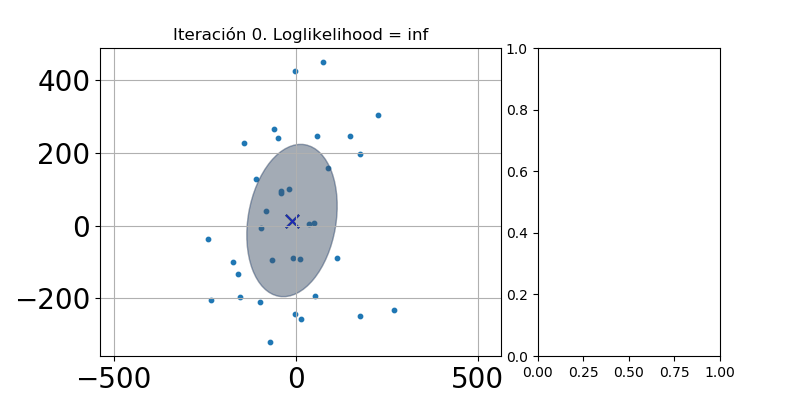

ValueError: cannot reshape array of size 12 into shape (3,1)

In [7]:
LL_old = -np.inf # Loglikelihood inicial
LL = []

# Levanto los datos que voy a usar
data = np.load('./X_ST.npz')
X = data['x'] # Muestras
ST = data['y'] # Secuencia temporal
d = X.shape[1]

# Genero el modelo inicial
mu = np.tile(X.mean(axis=0),(3,1)) # Medias iniciales
sigma = np.tile(np.cov(X.T),(3,1,1)) # Varianzas iniciales
trans = np.array([[0., 1., 0., 0., 0.], # Matriz de tranciones iniciales
                  [0., .5, .5, 0., 0.],
                  [0., 0., .5, .5, 0.],
                  [0., 0., 0., .5, .5],
                  [0., 0., 0., 0., 1.]]) 

HMM = hmm(mu,sigma,trans) # Modelo inicial

# Inicialización del gráfico
fig = plt.figure()
ax1 = fig.add_subplot(1,3,(1,2))
ax2 = fig.add_subplot(1,3,3)
plt.ion()
fig.show()
ax1.scatter(X[:,0],X[:,1],s=10)
ax1.set_title('Iteración 0. Loglikelihood = inf')
ax1.grid(True)
ax1.axis('equal')

classes_names = np.array(['Fonema 1', 'Fonema 2', 'Fonema 3'],dtype=object) # Nombre de cada clase
classes_colors = np.array(['#FF0000', '#00FF00', '#0000FF'],dtype=object) # Color de cada clase
for k in range(HMM.numStates-2):
    ax1.scatter(HMM.means[k,0],HMM.means[k,1],marker='x',s=90,color=classes_colors[k])
    covariance_ellipse(HMM.means[k],HMM.vrs[k],ax=ax1,color=classes_colors[k])
fig.canvas.draw()

i = 0
while i<10:
    
    # LogGamma y  LogXi:
    log_gamma = get_gamma(X,HMM)
    log_xi = get_xi(X,HMM)

    # Actualización de la media y covarianza:
    gamma = np.exp(log_gamma).T
    Nk = gamma.sum(axis=0)[:,np.newaxis]
    HMM.means = (X.T @ gamma).T / Nk
    X_unbiased = X - HMM.means[:,np.newaxis]
    HMM.vrs = np.matmul(np.transpose(X_unbiased,(0,2,1)),np.einsum('ijk,ji->ijk',X_unbiased,gamma)) / Nk[:,np.newaxis]

    # Actualización de la matriz de transición:
    xi = np.exp(log_xi)
    trans1 = np.hstack((np.zeros((HMM.numStates-2,1)),xi.sum(axis=0) / Nk,(1 - a.sum(axis=1)).reshape(HMM.numStates-2,1)))
    trans2 = np.vstack((np.zeros(HMM.numStates),trans1,np.zeros(HMM.numStates)))
    trans2[0,1] = 1
    trans2[-1,-1] = 1
    HMM.trans = trans2

#     # Loglikelihood:
#     LL_new = np.log( ((1 / (2*np.pi)**(d/2) / np.sqrt(np.linalg.det(HMM.vrs))) * np.exp(-1/2 * np.einsum('ijk,ijk->ij',np.matmul(X_unbiased,np.linalg.inv(HMM.vrs)),X_unbiased)).T * pi.T).sum(axis=1)).sum()
#     LL.append(LL_new)
    i=0
    # Grafico las medias y las muestras clasificadas.
    ax1.cla()
    ax1.grid(True)
    ax1.axis('equal')
    ax1.set_title('Iteración '+str(i))#+'. Loglikelihood = '+str(LL_new))
    ax1.scatter(X[:,0],X[:, 1],color=gamma.astype(np.float32),s=10)
    for k in range(HMM.numStates-2):
        ax1.scatter(HMM.means[k,0],HMM.means[k,1],marker='x',s=90,color=classes_colors[k])
        covariance_ellipse(HMM.means[k],HMM.vrs[k],ax=ax1,color=classes_colors[k])
    fig.canvas.draw()

#     # Si el likelihood no varió con respecto a la iteración anterior, me voy.
#     if np.abs(LL_new - LL_old) < epsilon:
#         break

#     # En otro caso, sigo iterando.
#     LL_old = LL_new
    i += 1

In [ ]:
print(HMM.means)
print(hmm6.means)
print(HMM.vrs)
print(hmm6.vrs)
print(HMM.trans[1:-1,1:-1])
print(hmm6.trans[1:-1,1:-1])


In [ ]:
def logvit(X,hmm):
    
    T = X.shape[0] # Cantidad de mediciones
    N = hmm.numStates - 2 # Cantidad de estados sin contar el final y el inicial
    zero = 1e-100 # Valor mínimo para evitar división por cero
    
    # Evaluación del logaritmo de la normal 
    log_b = logpdfnorm(hmm.means,hmm.vrs,X)
        
    # Matriz de transición para la recursión
    log_trans = hmm.trans[1:-1,1:-1].copy()
    log_trans[log_trans<zero] = zero
    np.log(log_trans, out=log_trans)
    
    # Inicialización del log_phi
    log_phi = np.zeros((N,T),dtype=np.float)
    log_phi0 = hmm.trans[0,1:-1].copy()
    log_phi0[log_phi0<zero] = zero
    np.log(log_phi0, out=log_phi0)
    log_phi[:,0] = log_b[0,:] + log_phi0
    
    # Inicialización del log_psi
    log_psi = np.ones((N,T),dtype=np.int)

    # Recursión forward
    for i in range(1,T):        
        m = log_trans + log_phi[:,i-1].reshape(N,1)
        log_psi[:,i] = np.argmax(m,axis=0)
        log_phi[:,i] = log_b[i,:] + np.max(m,axis=0)
    
    # Terminación:
    seqOpt = np.ones(T,dtype=np.int)
    seqOpt[-1] = np.argmax(log_phi[:,-1])    
    costOpt = log_phi[seqOpt[-1],-1].copy()
    
    # Backtracking:
    for i in range(T-1,0,-1):
        seqOpt[i-1] = log_psi[seqOpt[i],i].copy()
                
    return costOpt, seqOpt   